# **Exploratory Data Analysis Assignment - Spotify songs**

## A.Predictive Modeling Discussion

### **a.Are you working on a REGRESSION or CLASSIFICATION problem?**

**Response:** 

I am working on a regression problem, focus on the continuous response `track_popularity`.

### **b.Which variables are inputs?**

**Response:**

Three kinds of variables are inputs:
* Categorical variables: `playlist_genre`
* Continuous treated as categorical variables: `key`, `mode`
* Continuous variables: `valence`

### **c.Which variables are responses/outputs/outcomes/targets?**

**Response:** 

`track_popularity`

### **d.Did you need to DERIVE the responses of interest by SUMMARIZING the available data?**


**Response:**

Yes. Thanks for the comments from CMPINF 2100 - Final project feedback, `track_popularity` is a bounded variable and need to be modified when working on a regression problem.

### **e.If so, what summary actions did you perform?**

**Response:**

* Create the shift variable by subtracting a small number from the values of `track_popularity` if `track_popularity` equals 100, and adding a small number to `track_popularity` if track_popularity equals 0.

* Apply the logit transformation to create an unbounded variable that is more appropriate for regression methods.  

### **f.Which variables are identifiers and should NOT be used in the models?**

**Response:** 
* The data set has several ID variables, track_id, track_album_id, playlist_id. The data set also has names for the songs, album, and playlist. None of these variables should be used as inputs to predictive models.
* Reason: As shown in below 'marginal distribution', there are too many unique values of these id and name variables. The visulaization are rarely readable hence they are not suitable to be used as inputs in the models.

### **g.Important: Answer this question after completing parts C and D. Return to this predictive modeling discussion section to answer the following:**

Which of the inputs do you think influence the response, based on your exploratory visualizations? Which exploratory visualization helped you identify potential input-to-output relationships? (If you are not sure which inputs seem to influence the response, it is okay to say so.)

**Response:** 

I think the `playlist_genre` has an effect on the track_popularity when the track was released in 2004.

The box plot and point plot that visualize the categorical-to-continuous relationships helped me to identify the conclusion.

## B.Exploratory Data Analysis

### **a.You must read in the data associated with your project.**

#### import modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

#### read data

In [4]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

In [5]:
df = pd.read_csv(data_url)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

### **b.You must perform the ESSENTIAL Exploration activities**

i.Display the number of rows and columns.

ii.Display the column names and their associated data types.

iii.Display the number of missing values for each column. 

iv.Display the number of unique values for each column.

#### **i.Display the number of rows and columns.**

In [7]:
df.shape

(32833, 23)

#### **ii.Display the column names and their associated data types.**

In [8]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

#### **iii.Display the number of missing values for each column.**

In [9]:
df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

#### **iv.Display the number of unique values for each column.**

In [10]:
df.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

### **c.You must state whether you want to effectively treat a numeric column as a non-numeric for exploration purposes**

In [11]:
df.key.dtype

dtype('int64')

In [12]:
df.key.value_counts().value_counts()

count
4010    1
3454    1
3352    1
3027    1
2996    1
2827    1
2680    1
2670    1
2430    1
2273    1
2201    1
913     1
Name: count, dtype: int64

In [13]:
df.key.unique()

array([ 6, 11,  1,  7,  8,  5,  4,  2,  0, 10,  9,  3], dtype=int64)

In [14]:
df['mode'].dtype

dtype('int64')

In [15]:
df['mode'].value_counts().value_counts()

count
18574    1
14259    1
Name: count, dtype: int64

In [16]:
df['mode'].unique()

array([1, 0], dtype=int64)

**Response:** 

Yes, I will treat the variable `key` and `mode` as non-numeric columns for exploration purpose.

### **d.You do NOT need to display the COUNTS for categorical variables because you will visually display the variables. However, you may display/print COUNTS if it helps you.**

In [17]:
df.playlist_genre.value_counts()

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

### **e.You must visualize the MARGINAL distributions for ALL variables in your data.**

i.Continuous variables: Histograms or density plots.

ii.Categorical variables: Bar charts. 

#### **modify data**

In [18]:
# modify 1.drop missing as shown in B.b.iii
df1 = df.dropna()

In [19]:
df1.shape == df.shape

False

In [20]:
# modify 2.remove duplicate as stated in CMPINF 2100 - Final project feedback
df2 = df1.groupby(['track_id','track_album_id','playlist_id'],as_index=False).first()

In [21]:
df2.shape == df1.shape

False

In [22]:
# modify 3.transfer DATE variable as stated in CMPINF 2100 - Final project feedback
df2['track_album_release_date_dt'] = pd.to_datetime(df2.track_album_release_date,format='%Y-%m-%d', errors='coerce')

In [23]:
df2['release_year'] = df2.track_album_release_date_dt.dt.year
df2['release_month'] = df2.track_album_release_date_dt.dt.month

In [24]:
df2.columns

Index(['track_id', 'track_album_id', 'playlist_id', 'track_name',
       'track_artist', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'track_album_release_date_dt',
       'release_year', 'release_month'],
      dtype='object')

In [25]:
df2.dtypes

track_id                               object
track_album_id                         object
playlist_id                            object
track_name                             object
track_artist                           object
track_popularity                        int64
track_album_name                       object
track_album_release_date               object
playlist_name                          object
playlist_genre                         object
playlist_subgenre                      object
danceability                          float64
energy                                float64
key                                     int64
loudness                              float64
mode                                    int64
speechiness                           float64
acousticness                          float64
instrumentalness                      float64
liveness                              float64
valence                               float64
tempo                             

In [26]:
# modify 4.transfer track_popularity in a regression problem as stated in CMPINF 2100 - Final project feedback
df2['track_pop_shift'] = np.where(df2.track_popularity == 100, df2.track_popularity - 0.1,df2.track_popularity)
df2['track_pop_shift'] = np.where(df2.track_popularity == 0, df2.track_popularity + 0.1,df2.track_popularity)

In [27]:
df2['track_pop_frac']=df2.track_pop_shift / 100

df2['y'] =np.log(df2.track_pop_frac / (1 - df2.track_pop_frac))

In [28]:
df2.columns

Index(['track_id', 'track_album_id', 'playlist_id', 'track_name',
       'track_artist', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'track_album_release_date_dt',
       'release_year', 'release_month', 'track_pop_shift', 'track_pop_frac',
       'y'],
      dtype='object')

In [29]:
# modify 5.split and choose part of the dataframe
df3 = df2.loc[df2.release_year == 2004, :]

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 148 to 32181
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   track_id                     328 non-null    object        
 1   track_album_id               328 non-null    object        
 2   playlist_id                  328 non-null    object        
 3   track_name                   328 non-null    object        
 4   track_artist                 328 non-null    object        
 5   track_popularity             328 non-null    int64         
 6   track_album_name             328 non-null    object        
 7   track_album_release_date     328 non-null    object        
 8   playlist_name                328 non-null    object        
 9   playlist_genre               328 non-null    object        
 10  playlist_subgenre            328 non-null    object        
 11  danceability                 328 non-null    f

#### **visualize**

**i.Continuous variables: Histograms or density plots.**

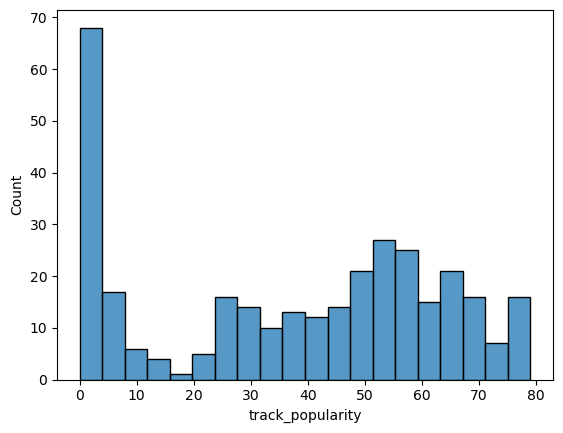

In [31]:
#track_popularity
fig, ax=plt.subplots()
sns.histplot(data=df3, x='track_popularity',bins=20,ax=ax)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


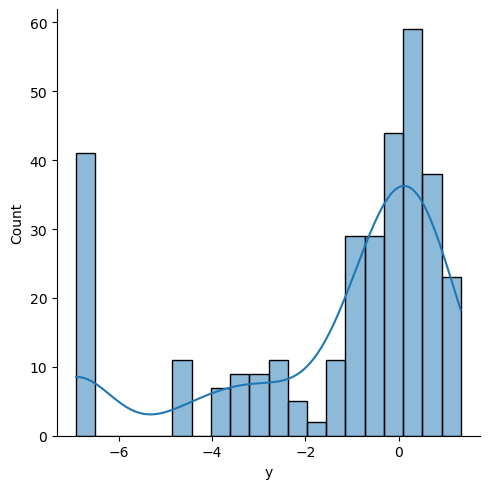

In [32]:
#y
sns.displot(data=df3,x='y',bins=20,kind='hist',kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


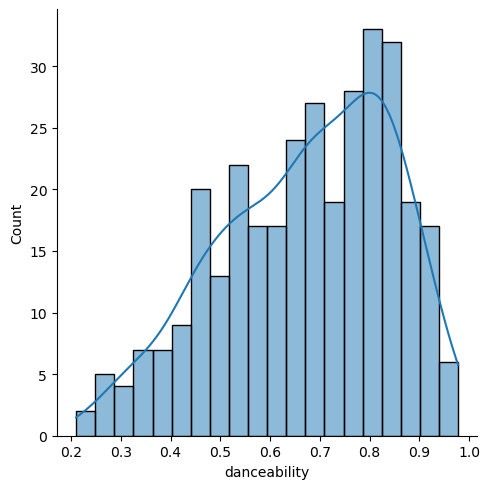

In [33]:
#danceability
sns.displot(data=df3, x='danceability', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


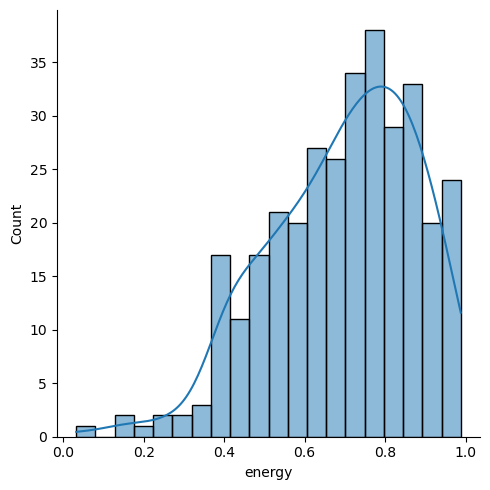

In [34]:
#energy
sns.displot(data=df3, x='energy', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


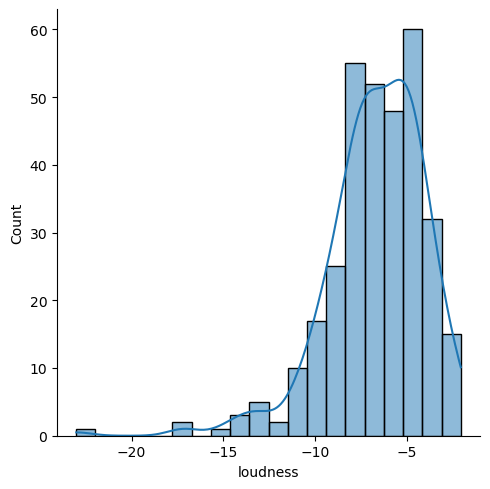

In [35]:
#loudness
sns.displot(data=df3, x='loudness', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


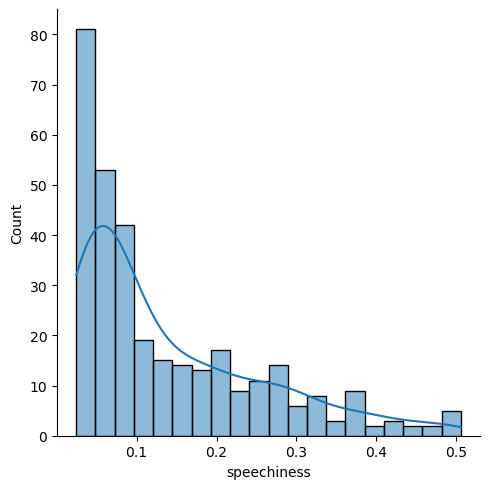

In [36]:
#speechiness
sns.displot(data=df3, x='speechiness', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


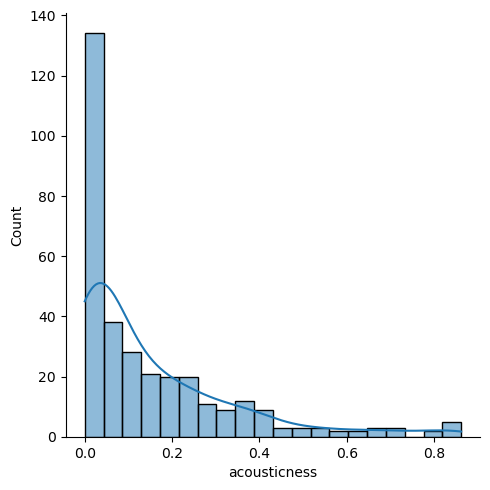

In [37]:
#acousticness
sns.displot(data=df3, x='acousticness', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


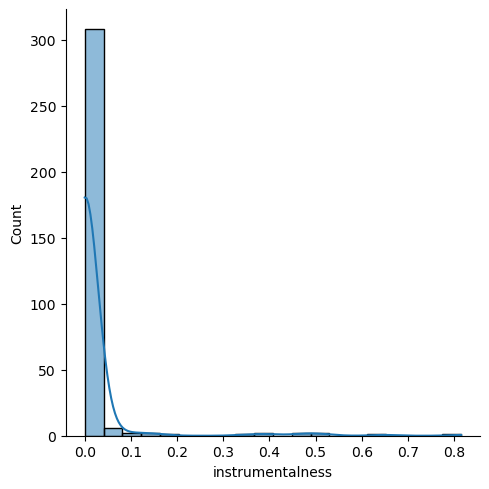

In [38]:
#instrumentalness
sns.displot(data=df3, x='instrumentalness', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


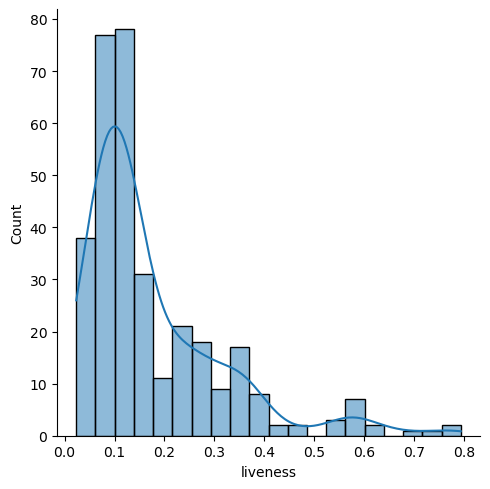

In [39]:
#liveness
sns.displot(data=df3, x='liveness', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


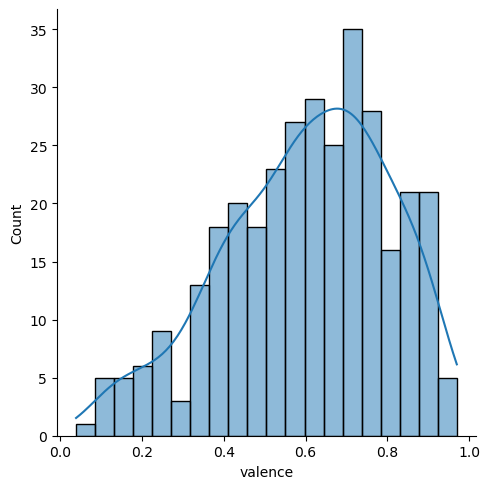

In [40]:
#valence
sns.displot(data=df3, x='valence', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


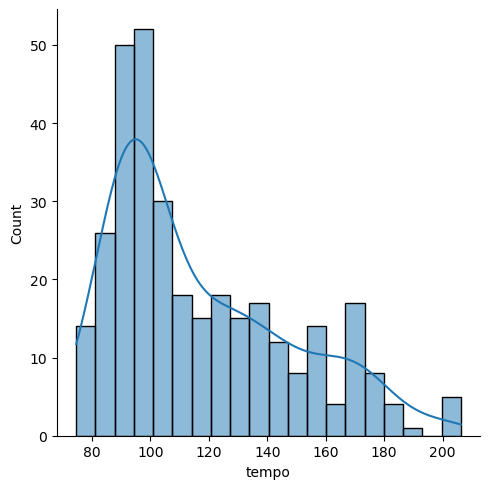

In [41]:
#tempo
sns.displot(data=df3, x='tempo', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


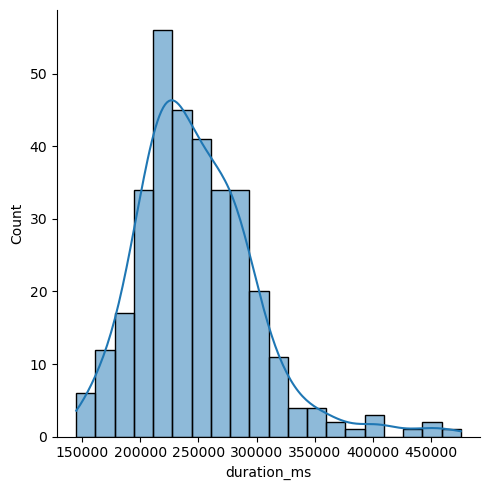

In [42]:
#duration_ms
sns.displot(data=df3, x='duration_ms', bins=20,kind='hist', kde=True)
plt.show()

**ii.Categorical variables: Bar charts.**

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


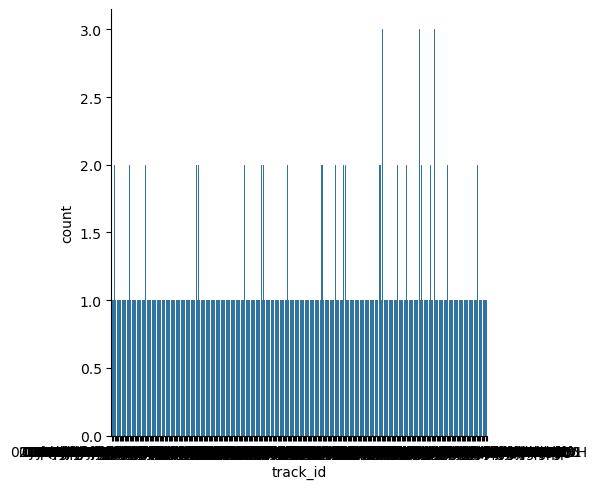

In [43]:
#track_id
sns.catplot(data=df3,x='track_id',kind='count',ax=ax)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


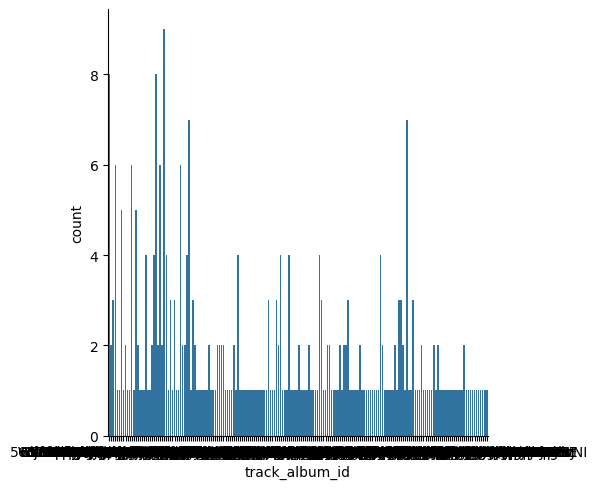

In [44]:
#track_album_id
sns.catplot(data=df3,x='track_album_id',kind='count',ax=ax)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


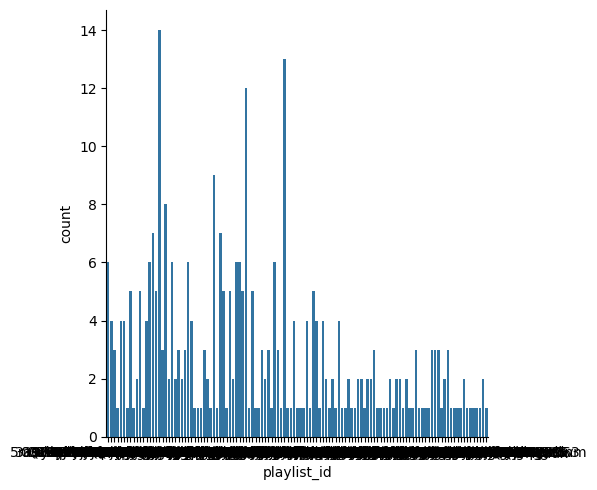

In [45]:
#playlist_id
sns.catplot(data=df3,x='playlist_id',kind='count',ax=ax)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


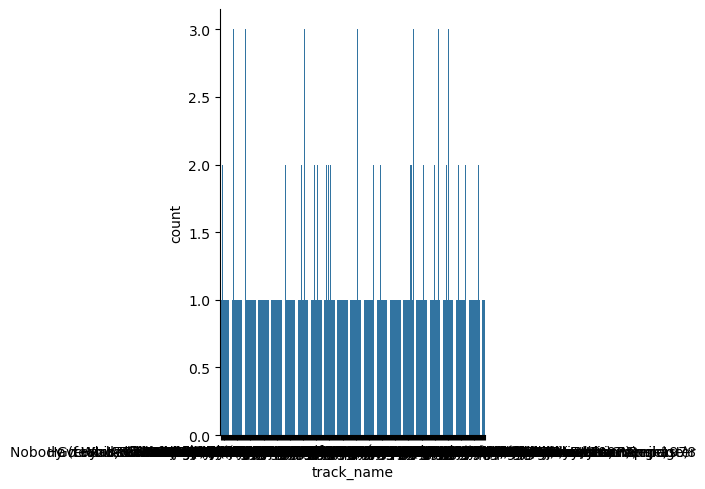

In [46]:
#track_name
sns.catplot(data=df3,x='track_name',kind='count',ax=ax)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


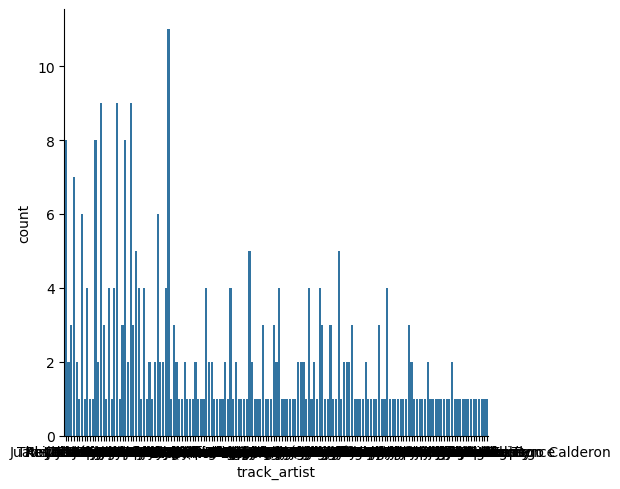

In [47]:
#track_artist
sns.catplot(data=df3,x='track_artist',kind='count',ax=ax)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


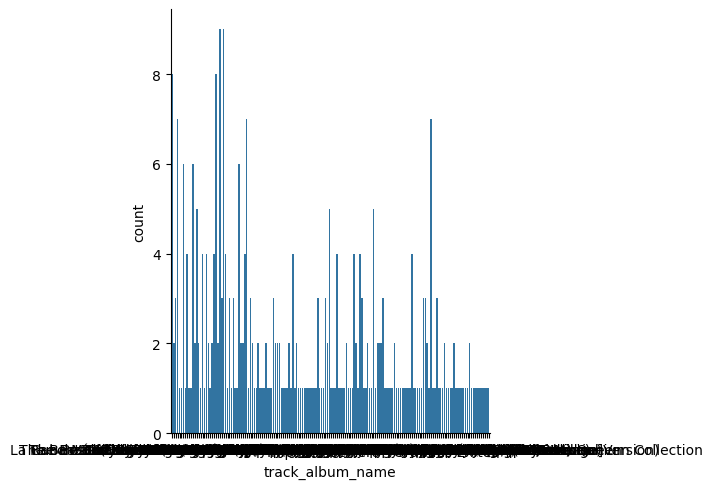

In [48]:
#track_album_name
sns.catplot(data=df3,x='track_album_name',kind='count',ax=ax)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


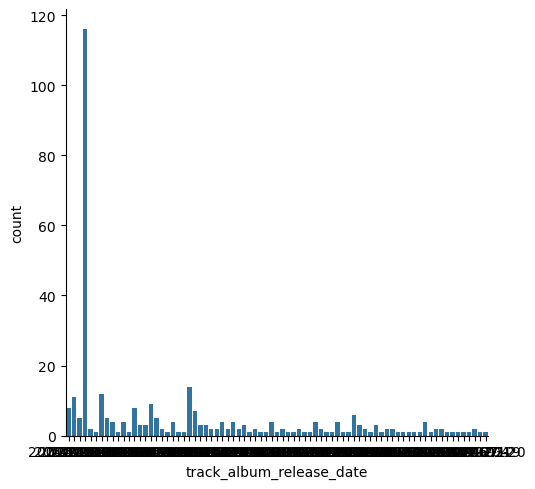

In [49]:
#track_album_release_date
sns.catplot(data=df3,x='track_album_release_date',kind='count',ax=ax)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 127796 (\N{PALM TREE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 128227 (\N{CHEERING MEGAPHONE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 127880 (\N{BALLOON}) missing from current font.
  self._

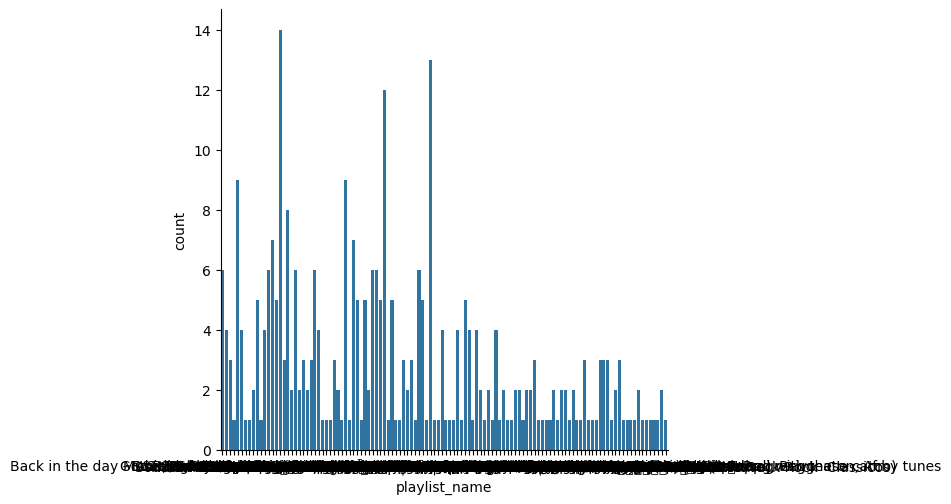

In [50]:
#playlist_name
sns.catplot(data=df3,x='playlist_name',kind='count',ax=ax)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


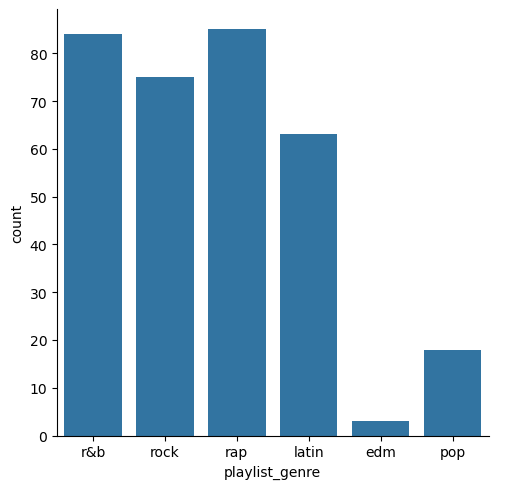

In [51]:
#playlist_genre
sns.catplot(data=df3,x='playlist_genre',kind='count',ax=ax)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


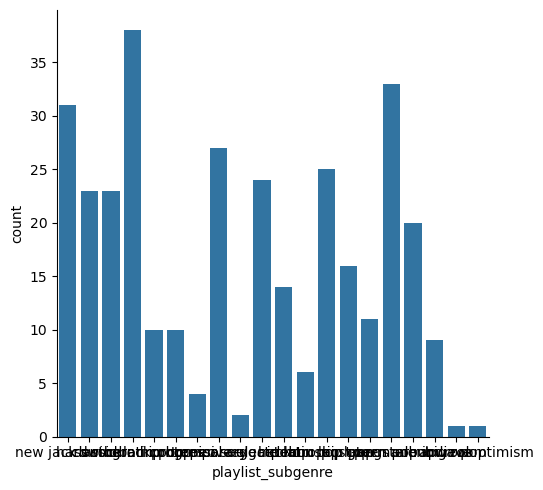

In [52]:
#playlist_subgenre
sns.catplot(data=df3,x='playlist_subgenre',kind='count',ax=ax)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


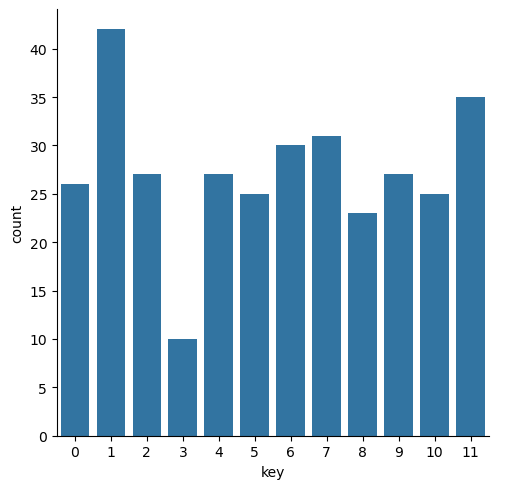

In [53]:
#key
sns.catplot(data=df3,x='key',kind='count',ax=ax)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


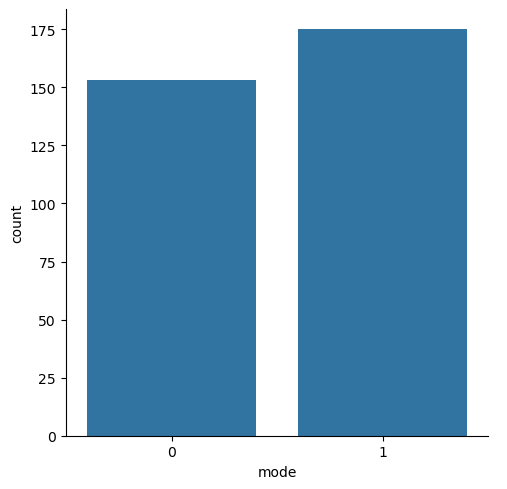

In [54]:
#mode
sns.catplot(data=df3,x='mode',kind='count',ax=ax)
plt.show()

### **f.You must decide appropriate visualizations to show:**

i.Categorical-to-categorical relationships (COMBINATIONS)

ii.Categorical-to-continuous relationships.

iii.Continuous-to-continuous relationships.

#### **i.Categorical-to-categorical relationships (COMBINATIONS)**


C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


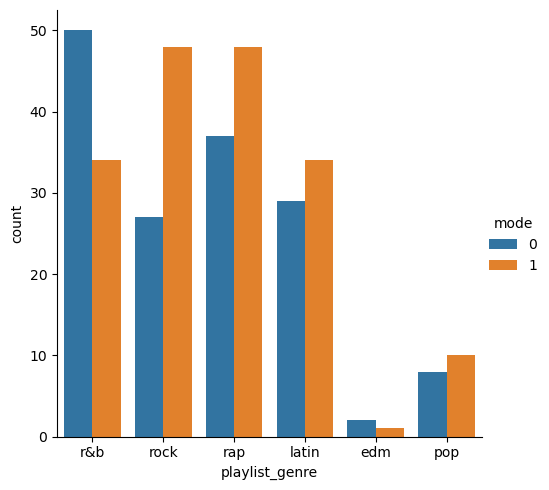

In [55]:
# 2 categorical variables in dodge bar charts
sns.catplot(data=df3, x='playlist_genre', hue='mode',kind='count')
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


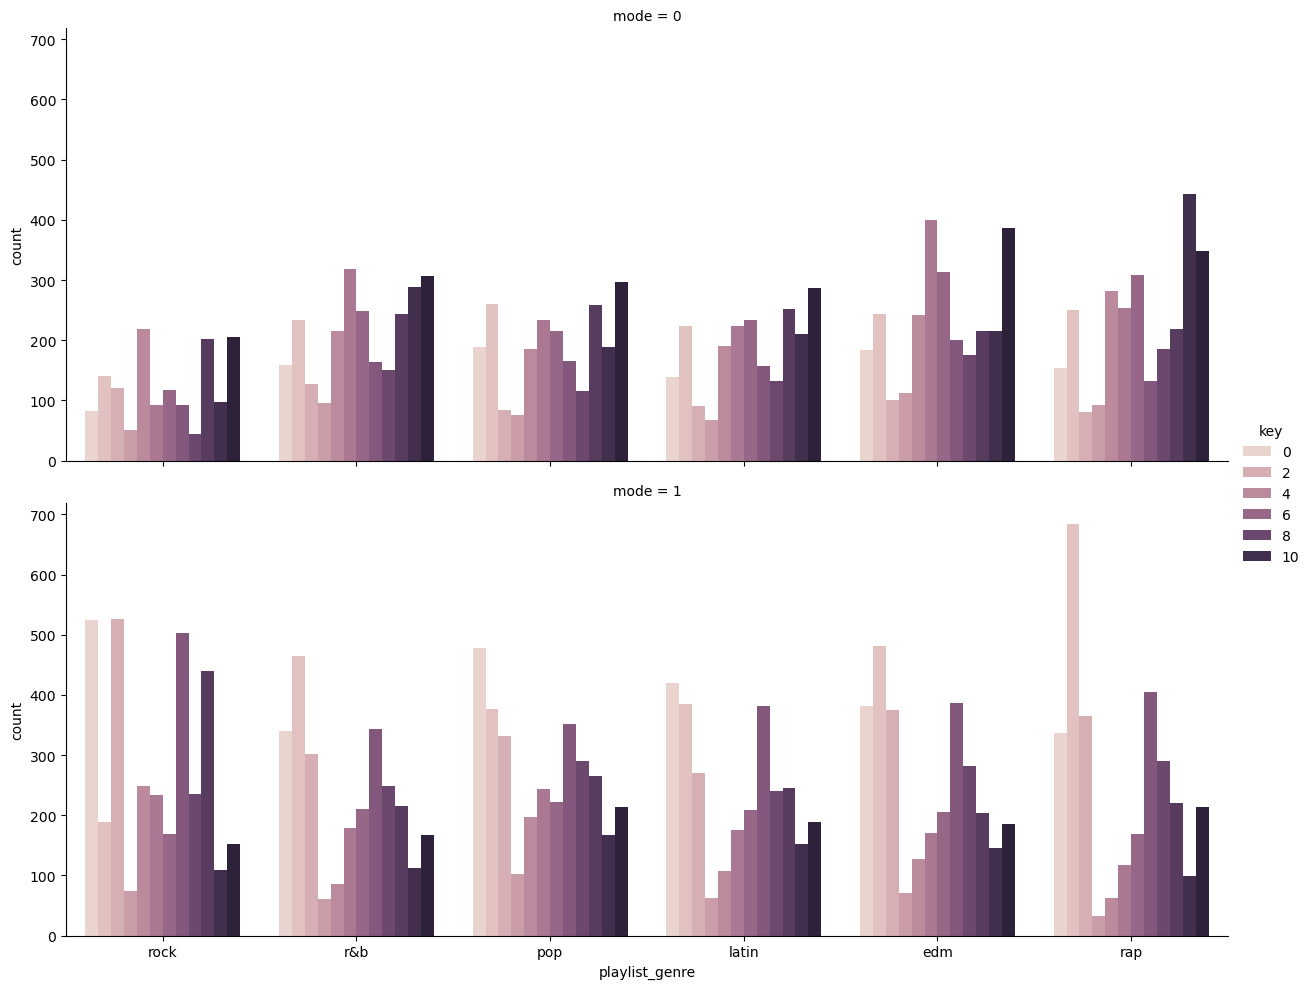

In [56]:
# 3 categorical variables in facets and dodged bar charts
sns.catplot(data=df2, x='playlist_genre', hue='key', row='mode',kind='count',aspect=2.5)
plt.show()

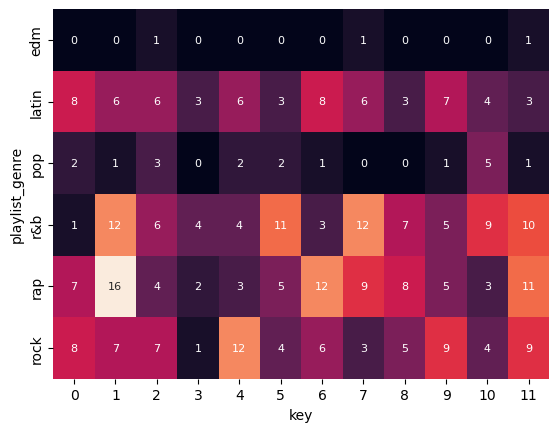

In [57]:
# 2 categorical variables in heatmap
fig, ax=plt.subplots()
sns.heatmap(pd.crosstab(df3.playlist_genre,df3.key),ax=ax,
           annot=True, annot_kws={'size':8}, fmt='d',
           cbar=False)
plt.show()

#### **ii.Categorical-to-continuous relationships.**

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


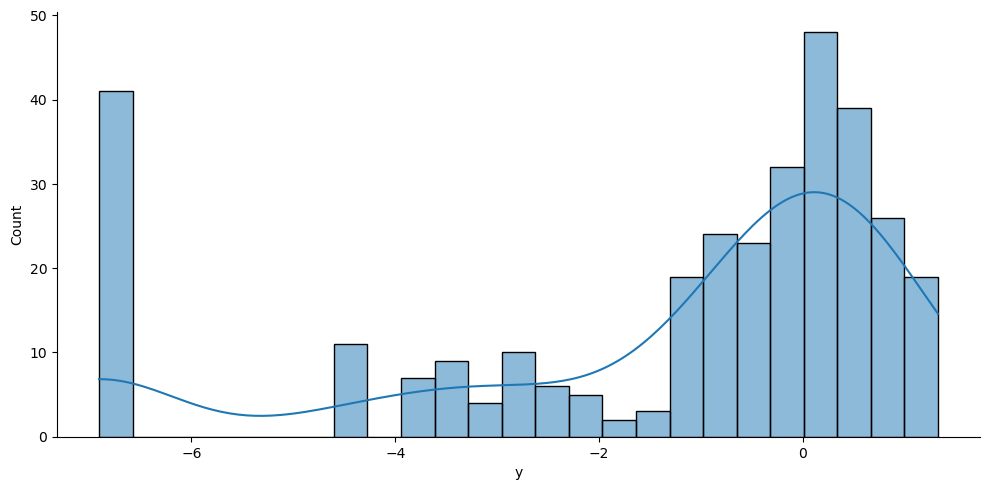

In [58]:
#1.check marginal distribution of y
sns.displot(data=df3, x='y',bins=25,kde=True,aspect=2)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


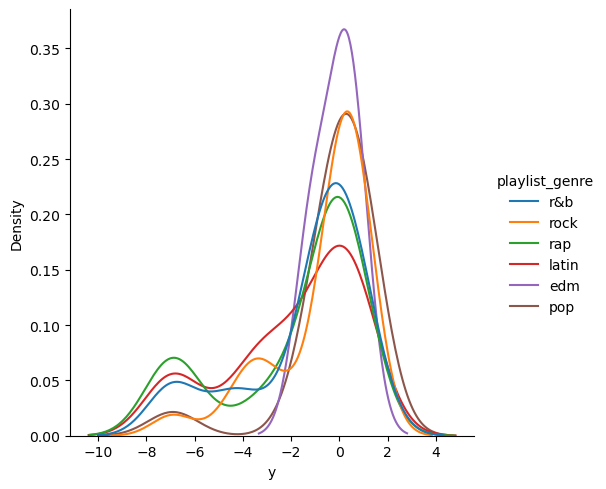

In [59]:
#2. set commom_norm=False to avoid the sample size effect.
sns.displot(data=df3, x='y',hue='playlist_genre',
           common_norm=False,kind='kde')
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


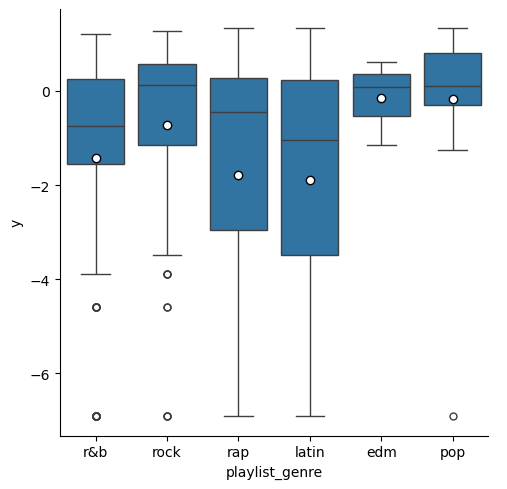

In [60]:
#3. use box plot to visulaize since not long tail distribution,
sns.catplot(data=df3,x='playlist_genre', y='y',kind='box',
           showmeans=True,
           meanprops={'marker':'o', 
                      'markerfacecolor': 'white',
                      'markeredgecolor':'black'})
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


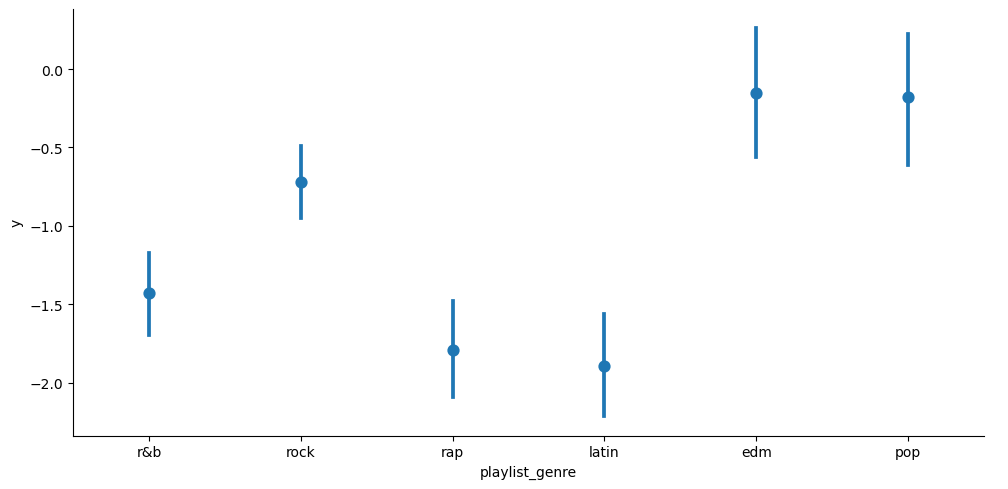

In [61]:
#4.use point plot to see confidence interval
sns.catplot(data=df3, x='playlist_genre', y='y', kind='point',aspect=2,
            linestyle='None',errorbar=('ci',68))
plt.show()

#### **iii.Continuous-to-continuous relationships.**

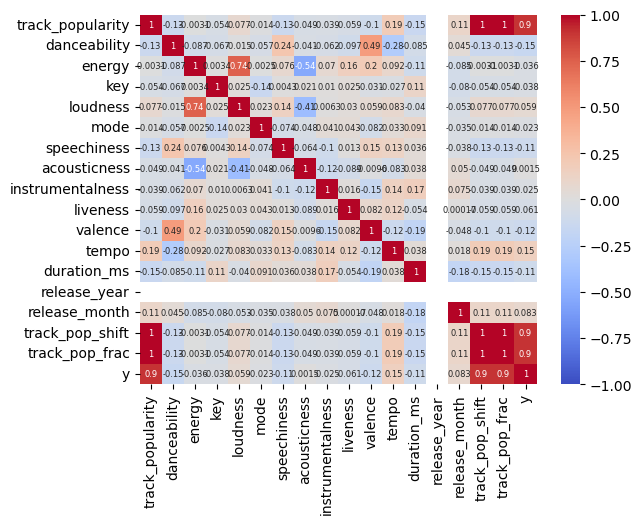

In [62]:
# 1.study relationship between all continuous variables
fig, ax=plt.subplots()

sns.heatmap(data=df3.corr(numeric_only=True),
            vmin=-1,vmax=1,center=0,
            cmap='coolwarm',
            annot=True, annot_kws={'size':6},
            ax=ax)

plt.show()

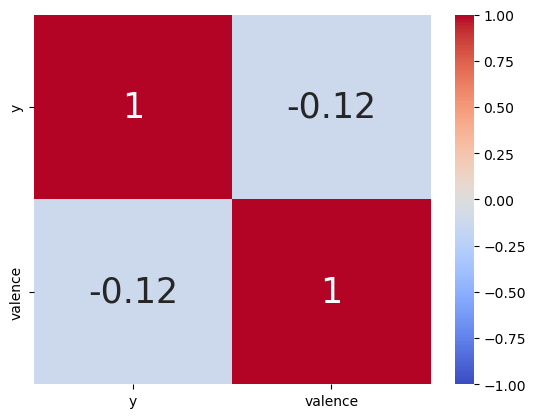

In [63]:
# 2.study relationships between 2 continuous variables
fig, ax=plt.subplots()

sns.heatmap(data=df3.loc[:,['y','valence']].corr(),
            vmin=-1,vmax=1,center=0,
            cmap='coolwarm',
            annot=True, annot_kws={'size':25},
            ax=ax)

plt.show()

### **g.You must decide appropriate visualizations to show if RELATIONSHIPS change across GROUPS. This is especially important to continuous-to-continuous relationships. Do not forget though that categorical-to-continuous relationships can also be GROUPED BY a secondary categorical variable!**

#### 1.continuous-to-continuous relationships change across GROUP

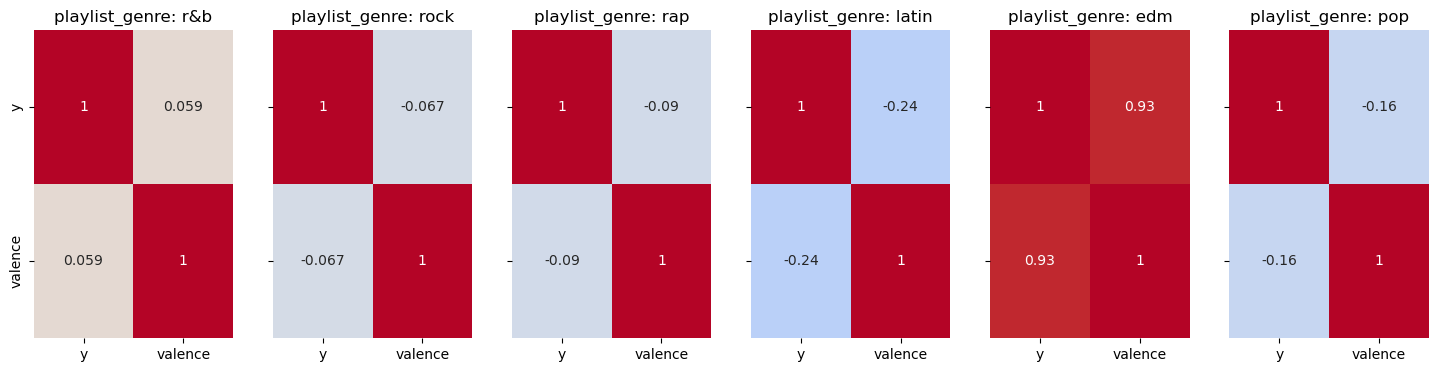

In [64]:

the_groups = df3.playlist_genre.unique()

corr_per_group = df3.loc[:,['y','valence','playlist_genre']].groupby(['playlist_genre']).corr()

fig, axs=plt.subplots(1,len(the_groups),figsize=(18,4),sharex=True,sharey=True)
for ix in range(len(the_groups)):
    sns.heatmap(data=corr_per_group.loc[the_groups[ix]],
                vmin=-1,vmax=1,center=0,
                cmap='coolwarm',cbar=False,
                annot=True,annot_kws={'size':10},
                ax=axs[ix])
    axs[ix].set_title('playlist_genre: %s' % the_groups[ix])

plt.show()

#### 2.categorical-to-continuous relationships group by a secondary categorical variable

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


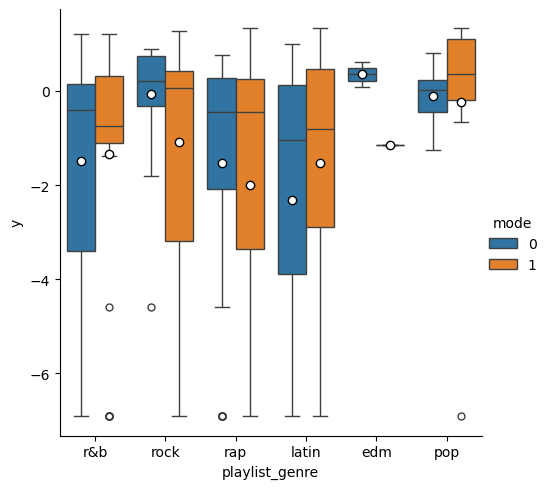

In [65]:

sns.catplot(data=df3,x='playlist_genre', y='y', hue='mode', kind='box',
           showmeans=True,
           meanprops={'marker':'o', 
                      'markerfacecolor': 'white',
                      'markeredgecolor':'black'})
plt.show()

#### 3.categorical-to-continuous relationships group by a secondary categorical variable 

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


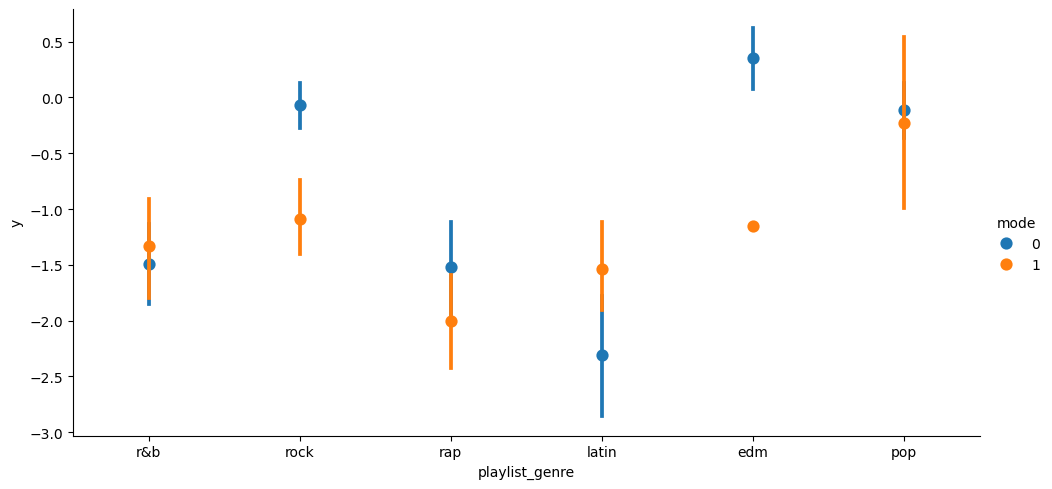

In [66]:

sns.catplot(data=df3, x='playlist_genre', y='y', hue='mode',kind='point',aspect=2,
            linestyle='None',errorbar=('ci',68))
plt.show()

### **h.If you are working on a REGRESSION problem, you must:**

i.Visualize the relationship between the continuous response and the continuous inputs using scatter plots and trend plots.

ii.Group the relationships by categorical variables (if appropriate).
 
iii.Summarize the response for each unique value of the categorical inputs using boxplots, violin plots, and point plots. 

#### **i.Visualize the relationship between the continuous response and the continuous inputs using scatter plots and trend plots.**

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


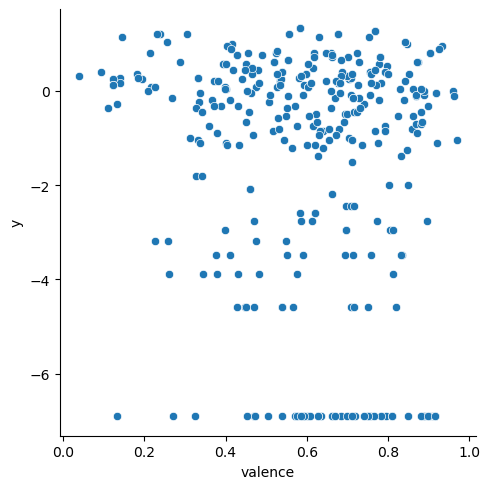

In [67]:
#i.Visualize the relationship between the continuous response and the continuous inputs using scatter plots and trend plots.
sns.relplot(data=df3,x='valence',y='y')

plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


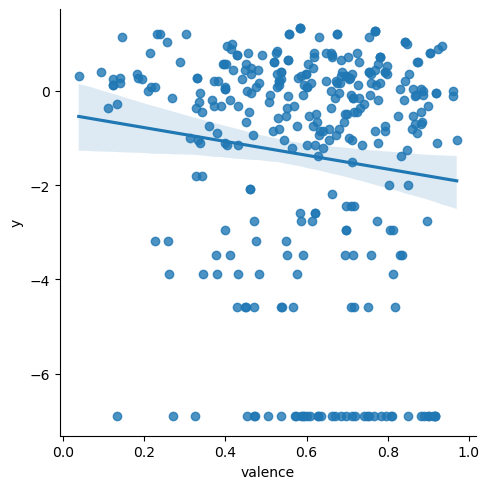

In [68]:
sns.lmplot(data=df3,x='valence',y='y')

plt.show()

#### **ii.Group the relationships by categorical variables (if appropriate).**

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


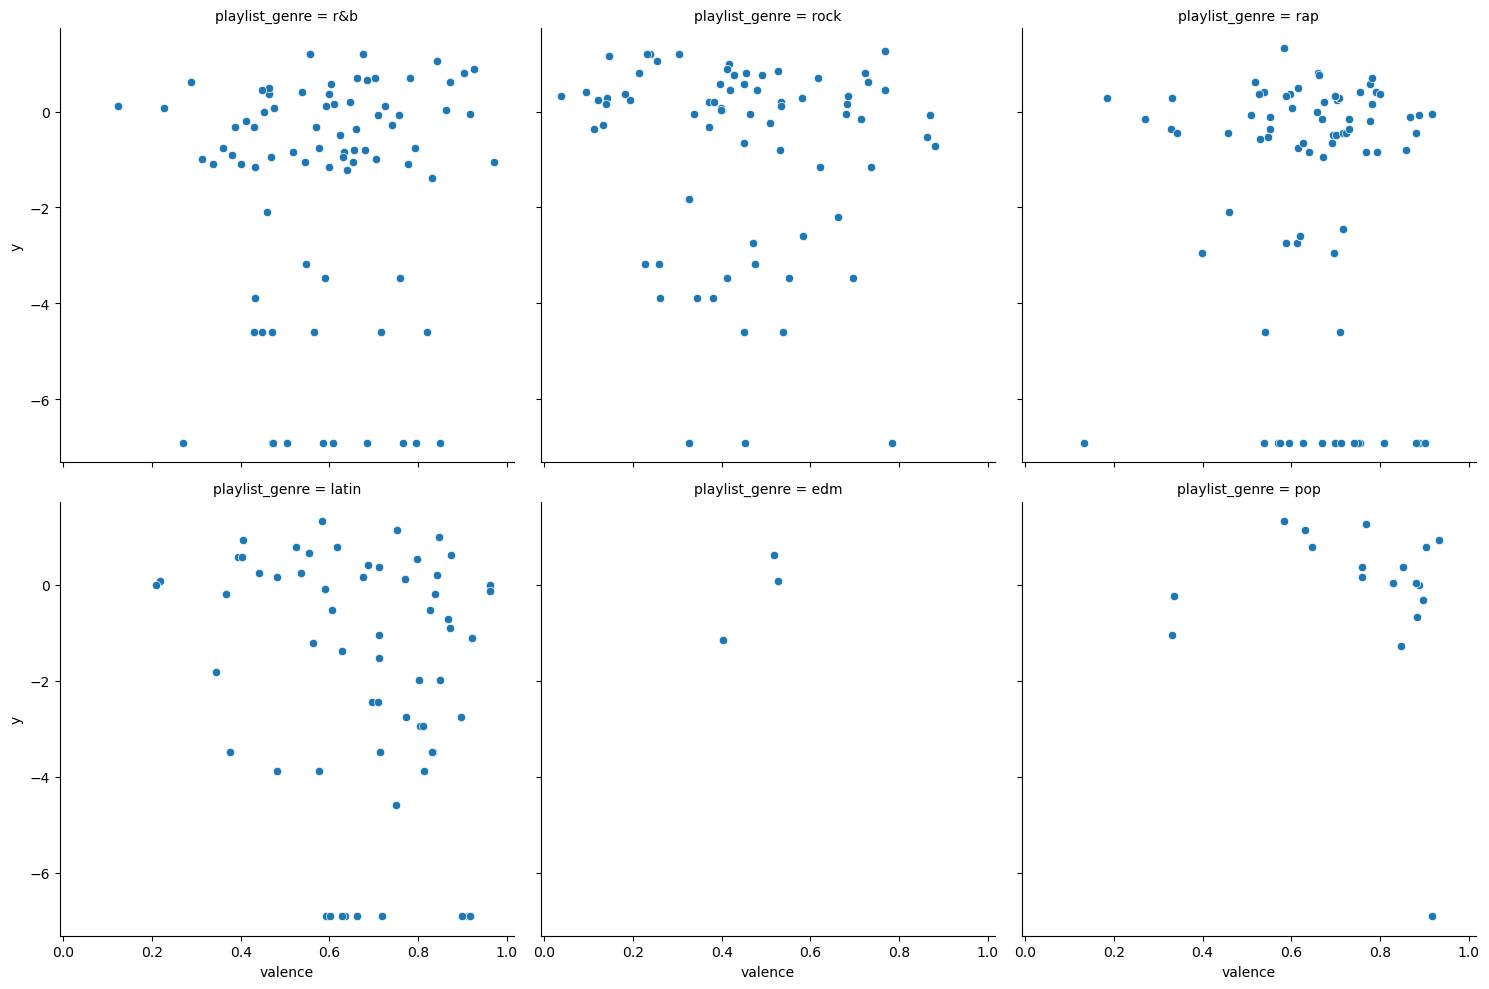

In [69]:
# ii.Group the relationships by categorical variables (if appropriate). 
sns.relplot(data=df3,x='valence',y='y',col='playlist_genre',col_wrap = 3)

plt.show()

#### **iii.Summarize the response for each unique value of the categorical inputs using boxplots, violin plots, and point plots.**

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


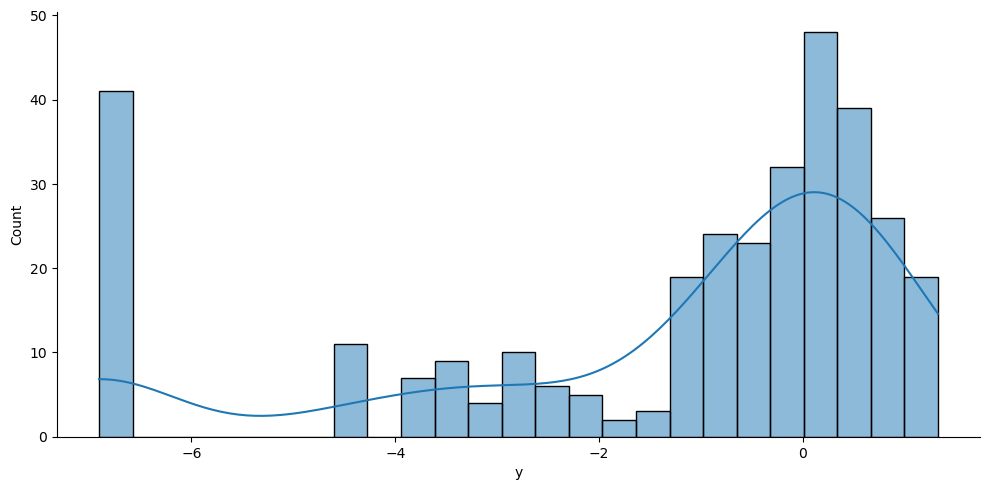

In [70]:
# iii.Summarize the response for each unique value of the categorical inputs using boxplots, violin plots, and point plots.
sns.displot(data=df3,x='y',bins=25,kde=True,aspect=2)

plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


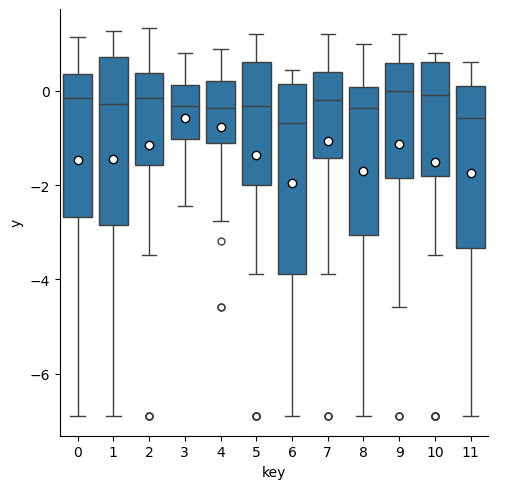

In [71]:
#box plot 1
sns.catplot(data=df3, x='key', y='y',kind='box',
            showmeans=True,
            meanprops={'marker':'o',
                      'markerfacecolor':'white',
                      'markeredgecolor':'black'})
plt.show()


C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


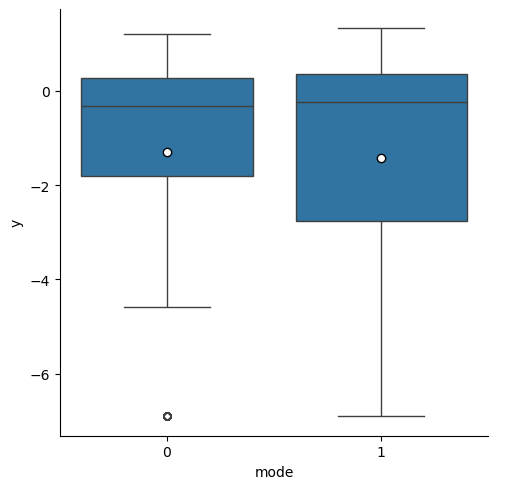

In [72]:
#box plot 2
sns.catplot(data=df3, x='mode', y='y',kind='box',
            showmeans=True,
            meanprops={'marker':'o',
                      'markerfacecolor':'white',
                      'markeredgecolor':'black'})
plt.show()


C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


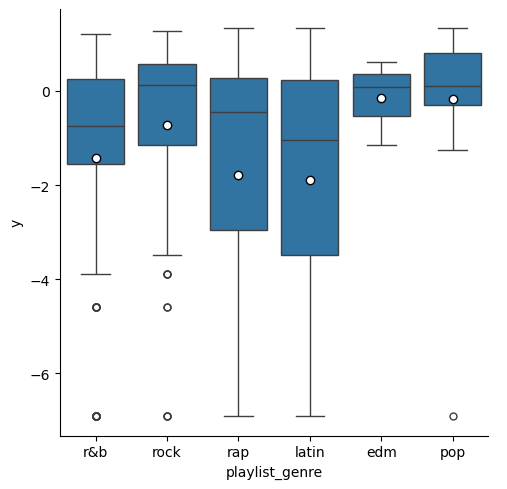

In [73]:
#box plot 3
sns.catplot(data=df3, x='playlist_genre', y='y',kind='box',
            showmeans=True,
            meanprops={'marker':'o',
                      'markerfacecolor':'white',
                      'markeredgecolor':'black'})
plt.show()


C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


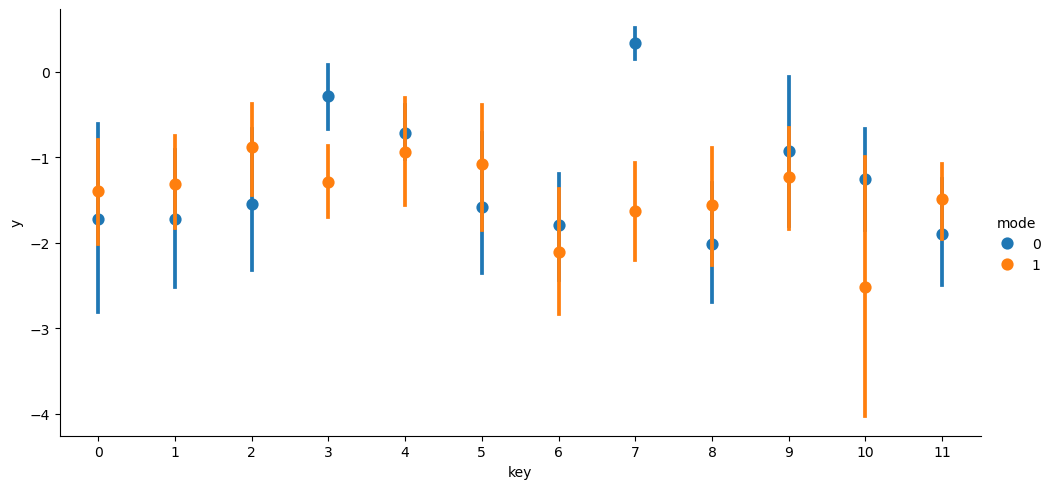

In [74]:
#point plot 1
sns.catplot(data=df3, x='key', y='y', hue='mode',kind='point',aspect=2,
            linestyle='None',errorbar=('ci',68))
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


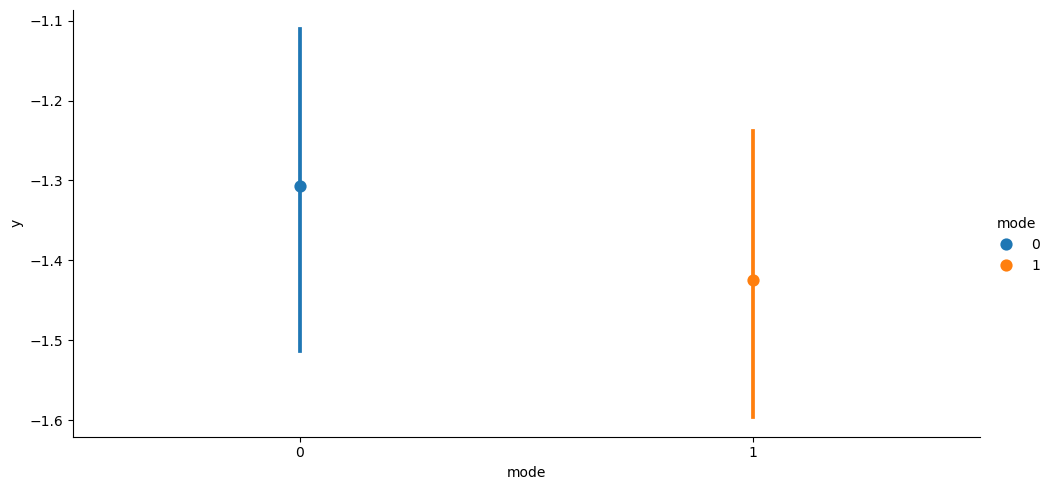

In [75]:
#point plot 2
sns.catplot(data=df3, x='mode', y='y', hue='mode',kind='point',aspect=2,
            linestyle='None',errorbar=('ci',68))
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


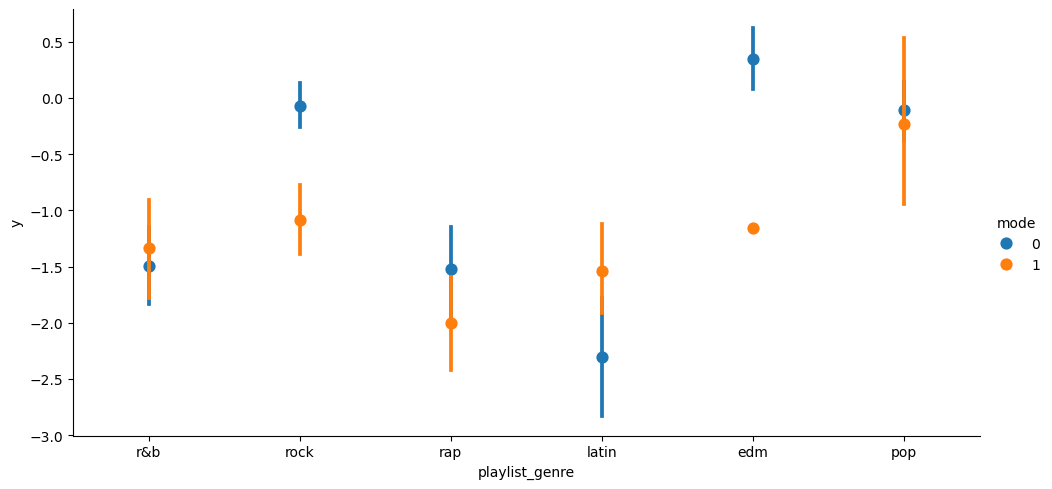

In [76]:
#point plot 3
sns.catplot(data=df3, x='playlist_genre', y='y', hue='mode',kind='point',aspect=2,
            linestyle='None',errorbar=('ci',68))
plt.show()

### **i.If you are working on a CLASSIFICATION problem, you must:**

i.Visualize conditional distributions of the continuous inputs GROUPED BY the response (outcome) unique values
.
ii.Visualize relationships between continuous inputs GROUPED BY the response (outcome) unique value
s.
iii.Visualize the counts of combinations between the response (outcome) and categorical inp.uts

**Response:** NA

## C.Cluster Analysis

### **a.Select variables. You MUST state which class of variables you used in your cluster analysis.**

i.Cluster using CONTINUOUS inputs

ii.Cluster using CONTINUOUS responses (if you have multiple outputs)

iii.Cluster using multiple summary statistics derived from inputs. For example, if your data includes MANY categorical variables, consider GROUPING BY them and SUMMARIZING the OTHER inputs. Summary statistics to consider: number of unique values, mean, standard deviation, median, etc

If you do this, do NOT start by creating COMBINATIONS of ALL categorical inputs. Select a few which provide many COMBINATIONS.

iv.Cluster using multiple summary statistics derived from the outputs. For example, if your data includes MANY categorical variables consider GROUPING BY them and SUMMARIZING the outputs. Summary statistics to consider: number of unique values, mean, standard deviation, median, etc

If you do this, do NOT start by creating COMBINATIONS of ALL categorical inputs. Select a few which provide many COMBINATIONS.

**Response:** 

I will cluster using continuous inputs: `valence` and `energy`.

### **b.Consider the following for your cluster analysis:**


#### **i.How many variables are you using relative to the number of observations?**

**Response:** 

2 continuous variables.

#### **ii.Are the variables you are using “Gaussian-like” or are the distributions “odd looking”? You must visualize the MARGINAL histograms of the variables IF you are using summary statistics derived from INPUTS or OUTPUTS. If you are using the INPUTS or OUTPUTS directly, you already visualized the MARGINAL distributions.**

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


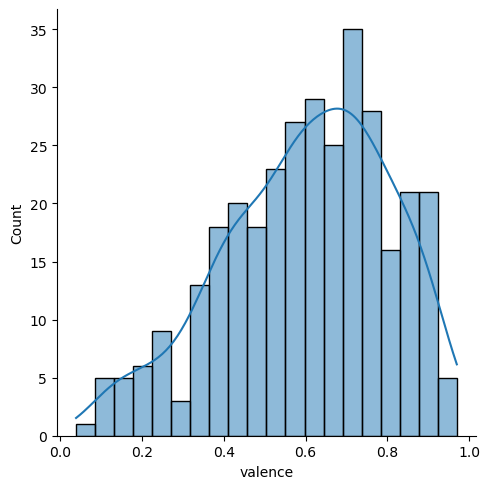

In [77]:
#valence
sns.displot(data=df3, x='valence',kind='hist',kde=True,bins=20)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


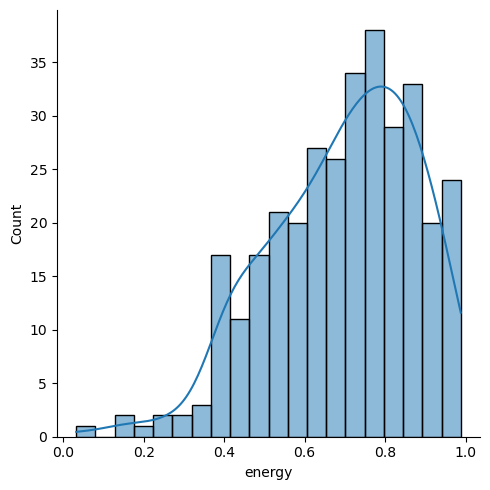

In [78]:
#energy
sns.displot(data=df3, x='energy',kind='hist',kde=True,bins=20)
plt.show()

**Response:** 

They are both 'Gaussian-like'.

#### **iii.Are the variables you are using highly correlated to each other? You must visualize the relationships between the variables you are using. If you are using the INPUTS/OUTPUTS directly then you already visualized those relationships.**

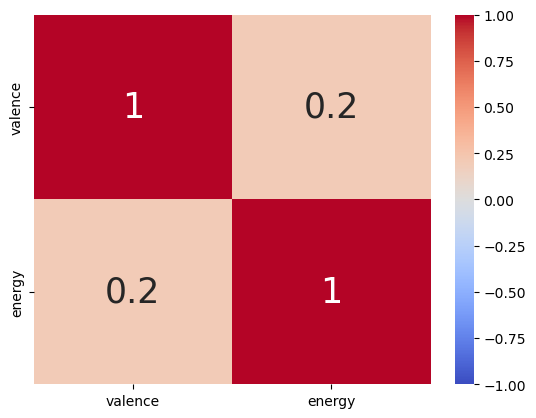

In [79]:
fig, ax=plt.subplots()

sns.heatmap(data=df3.loc[:,['valence','energy']].corr(),
            vmin=-1,vmax=1,center=0,
            cmap='coolwarm',
            annot=True, annot_kws={'size':25},
            ax=ax)

plt.show()

**Response:** 

Well, 0.2 represents that `valence` and `energy` variables are positive correlated but not so high I think. 

#### **iv.How should you handle missing values? If you drop all rows with at least one missing value, how many observations would you still have (thus, how many complete cases do you have)?**

In [80]:
df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [81]:
df.loc[df.track_name.isna() == True, ['track_name','track_artist','track_album_name','track_album_release_date']]

,track_name,track_artist,track_album_name,track_album_release_date
8151,NaN,NaN,NaN,2012-01-05
9282,NaN,NaN,NaN,2017-12-01
9283,NaN,NaN,NaN,2017-12-01
19568,NaN,NaN,NaN,2012-01-05
19811,NaN,NaN,NaN,2012-01-05


**Response:** 

In the step of `modify data`, I used `df.dropna()` which results in 5 rows being dropped in total. Afterwards, there are 32828 observations left in `df`. 

As shown above, no year equals 2004 is in the missing observations. Therefore, drop missing value has impact on `df` but not on `df3`. 

### **c.You must use KMeans to execute the Cluster analysis.**

In [82]:
df3c = df3.loc[:,['playlist_genre','valence','energy']]

In [83]:
df3c.playlist_genre.value_counts()

playlist_genre
rap      85
r&b      84
rock     75
latin    63
pop      18
edm       3
Name: count, dtype: int64

In [84]:
df3c_features = df3c.select_dtypes('number').copy()

In [85]:
df3c_features

,valence,energy
148,0.412,0.511
853,0.141,0.714
1045,0.533,0.651
1046,0.533,0.651
1083,0.768,0.846
...,...,...
32114,0.455,0.920
32134,0.269,0.744
32143,0.759,0.807
32160,0.260,0.661


#### **preprocessing**

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
Xdf3c = StandardScaler().fit_transform(df3c_features)

In [88]:
pd.DataFrame(Xdf3c, columns=df3c_features.columns)

,valence,energy
0,-0.936229,-1.013955
1,-2.274030,0.101941
2,-0.338908,-0.244371
3,-0.338908,-0.244371
4,0.821178,0.827549
...,...,...
323,-0.723958,1.234329
324,-1.642153,0.266852
325,0.776749,0.613165
326,-1.686582,-0.189401


### **d.First, use 2 clusters and:**

i.Count the number of observations per identified cluster. Are the clusters balanced?

ii.Visualize the cluster results between 2 of the variables used for the cluster analysis.

In [89]:
#cluster: 2
from sklearn.cluster import KMeans

In [90]:
type(Xdf3c)

numpy.ndarray

In [91]:
cluster2 = KMeans(n_clusters = 2, random_state =121, n_init =25, max_iter=500).fit_predict(Xdf3c)

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [92]:
df4 = df3c.copy()

In [93]:
df4['k2'] = pd.Series(cluster2, index=df4.index).astype('category')

In [94]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 148 to 32181
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   playlist_genre  328 non-null    object  
 1   valence         328 non-null    float64 
 2   energy          328 non-null    float64 
 3   k2              328 non-null    category
dtypes: category(1), float64(2), object(1)
memory usage: 18.8+ KB


#### **i.Count the number of observations per identified cluster. Are the clusters balanced?**

In [95]:
df4.groupby(['k2']).size()

k2
0    149
1    179
dtype: int64

**Response:** 

The clusters are almost balanced.

#### **ii.Visualize the cluster results between 2 of the variables used for the cluster analysis.**

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


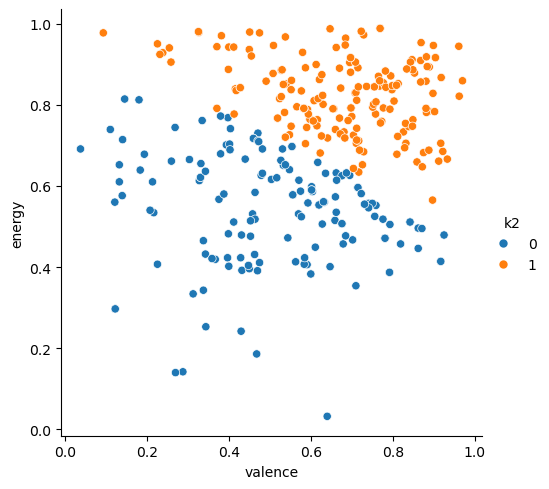

In [96]:
sns.relplot(data=df4,x='valence',y='energy',hue='k2')
plt.show()

### **e.Then, identify the optimal number of clusters, and rerun KMeans for the optimal number.**

i.Count the number of observations per identified cluster.

ii.Visualize the cluster results between 2 of the variables used for the cluster analysis.

#### **identify the optimal number of clusters**

In [97]:

tots_within =[]
K =range(1,31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter =500)
    km=km.fit(Xdf3c)
    tots_within.append(km.inertia_)

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmea

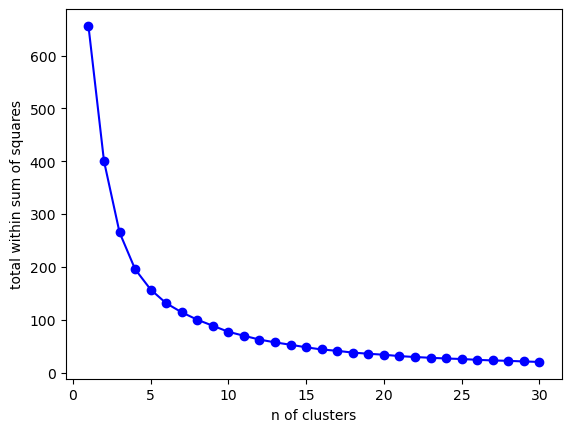

In [98]:
fig, ax=plt.subplots()

ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('n of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

In [99]:
tots_within

[656.0000000000002,
 400.250305942466,
 265.28780406465575,
 195.74600101608752,
 157.23503173678492,
 131.26813270549934,
 114.15316976580104,
 100.10126631819409,
 88.69995516740059,
 77.26589664423037,
 69.76578168054048,
 62.54636953157304,
 57.23553833900603,
 52.750457478903364,
 47.93221738127701,
 43.8147403420338,
 41.265459158035206,
 37.90253171128652,
 35.77414619425567,
 33.852751246871684,
 31.295903598254153,
 29.565364150104287,
 28.086816278254023,
 26.755925349127303,
 25.804775620186824,
 24.24900260072679,
 23.058482124637234,
 22.34308739584273,
 21.15075816286936,
 20.268223626306806]

**Response:** 

I will choose cluster equals 9 since the tots_within was below 100 for the first time:

In [100]:
cluster9 = KMeans(n_clusters=9, random_state=121,n_init=25,max_iter=500).fit_predict(Xdf3c)

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [101]:
df4['k9'] = pd.Series(cluster9, index=df4.index).astype('category')

In [102]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 148 to 32181
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   playlist_genre  328 non-null    object  
 1   valence         328 non-null    float64 
 2   energy          328 non-null    float64 
 3   k2              328 non-null    category
 4   k9              328 non-null    category
dtypes: category(2), float64(2), object(1)
memory usage: 19.4+ KB


#### **i.Count the number of observations per identified cluster.**

In [103]:
df4.groupby(['k9']).size()

k9
0    55
1    45
2    29
3    34
4    30
5    48
6    22
7    55
8    10
dtype: int64

In [104]:
df4.groupby(['playlist_genre']).size()

playlist_genre
edm       3
latin    63
pop      18
r&b      84
rap      85
rock     75
dtype: int64

**Response:** It seems more balanced than k2.

#### **ii.Visualize the cluster results between 2 of the variables used for the cluster analysis.**

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


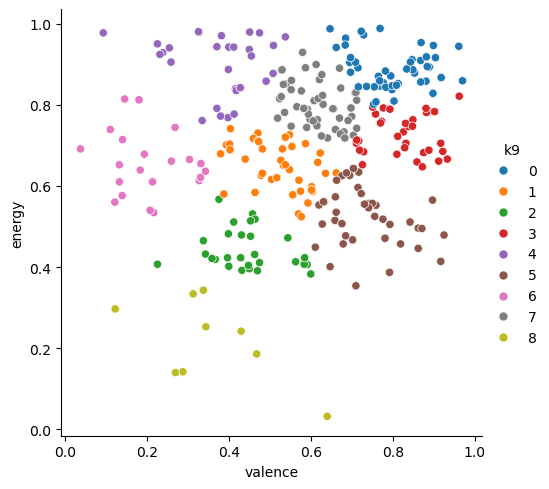

In [105]:
sns.relplot(data=df4,x='valence',y='energy',hue='k9')
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


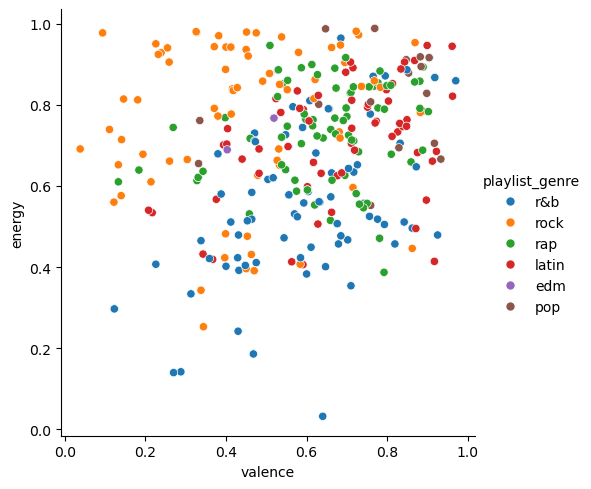

In [106]:
sns.relplot(data=df4,x='valence',y='energy',hue='playlist_genre')
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


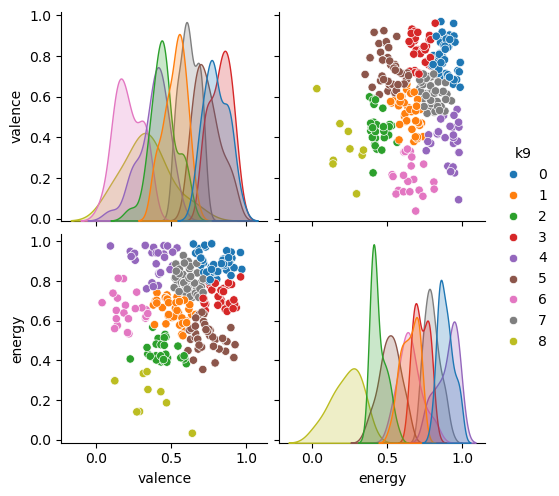

In [107]:
sns.pairplot(data = df4, hue='k9', diag_kws={'common_norm': False})

plt.show()

### **f.Interpret**

#### **i.Do the OPTIMAL number of clusters ALIGN with CATEGORIES of KNOWN grouping variables in your data?**

1.If you are working on a CLASSIFICATION problem, are the identified clusters consistent with the outcome categories?

2.If you are working on a REGRESSION problem, are the identified clusters consistent with categories of a categorical input?

**Response:** 

No. The optimal number I picked was 9 but the known playlist_genre is 6.

#### **ii.What are the CONDITIONAL distributions of the variables you used for clustering GIVEN the identified clusters?**

1.Use appropriate visualizations to study the CONDITIONAL distributions of the variables used for clustering GROUPED BY the identified clusters.

2.HINT: you are creating CONDITIONAL distributions using the DERIVED cluster groupings rather than using a “real” categorical variabl.e.
3.Describe the clusters based on the CONDITIONAL distributions.

**Response:** 

Neither `valence` nor `energy` is long tail distribution, thus I can use box plot to visualize the conditional distributions.

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


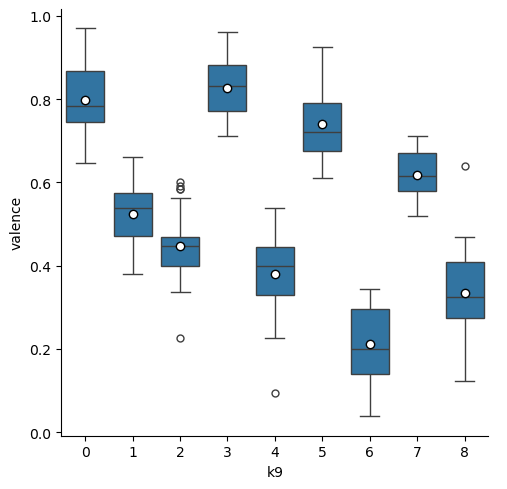

In [108]:
# valence
sns.catplot(data=df4,x='k9', y='valence',kind='box',
           showmeans=True,
           meanprops={'marker':'o', 
                      'markerfacecolor': 'white',
                      'markeredgecolor':'black'})
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


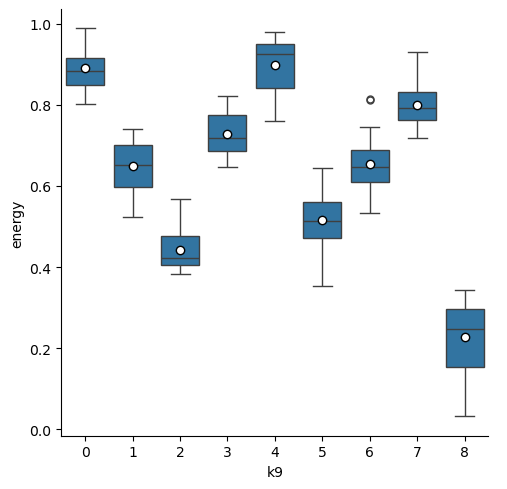

In [109]:
# energy
sns.catplot(data=df4,x='k9', y='energy',kind='box',
           showmeans=True,
           meanprops={'marker':'o', 
                      'markerfacecolor': 'white',
                      'markeredgecolor':'black'})
plt.show()

**Response:** 

The optimal number I picked was not consistant with the known playlist_genre because KMeans groups by distance. The closer observations are the more similar KMeans feels they are. Therefore, we want to minimize the total within sum of squares but only to an interesting level when use KMeans in 2 variables. The choice of optimal number was subjective.